# Class 1 - Phase identification - Single-Bus structure

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description

- While the connectivity model of low voltage (LV) grids is usually known, the phase connectivity information of single-phase connected customers is often erroneous or missing. This is due to many reasons including maintenance and other load balancing initiatives that usually do not update phase connectivity information and do not keep track of its changes in a systematic way.

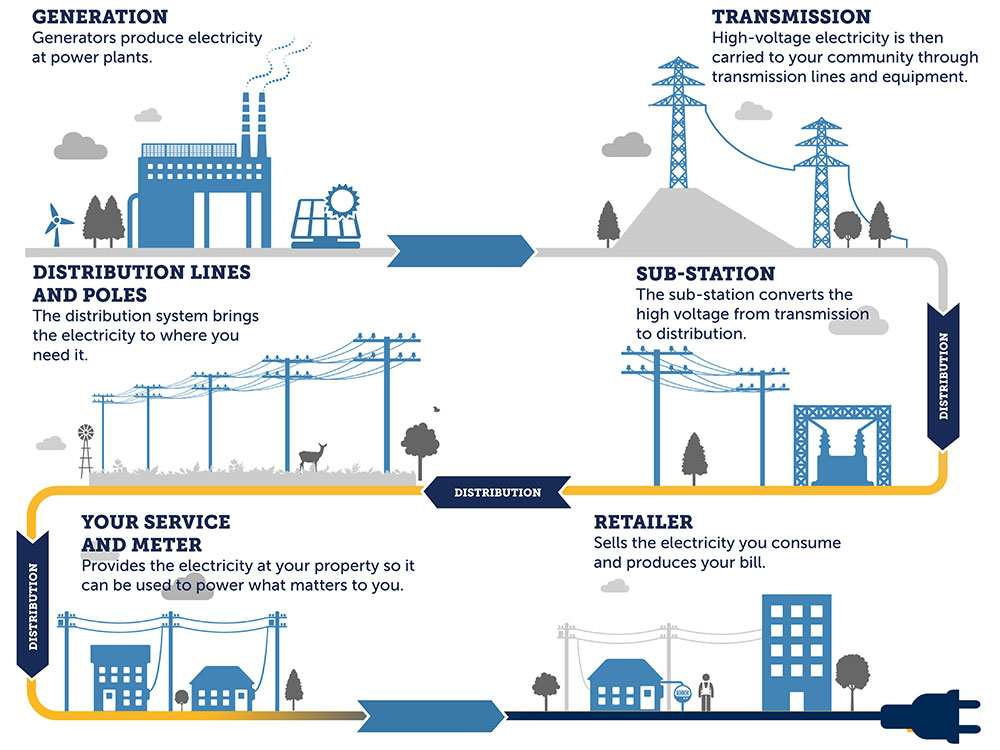
https://www.fortisalberta.com/about-us/our-company/blog/fortisalbertablog/2019/08/20/we-explain-the-complex-sophisticated-system-that-brings-electricity-to-you




- With the deployment of smart metering and the consequent availability
of high-resolution consumption data, phase connectivity
should be possible to estimate if data on per-phase aggregate energy
measurements would be available at substation sites with the
same resolutio.

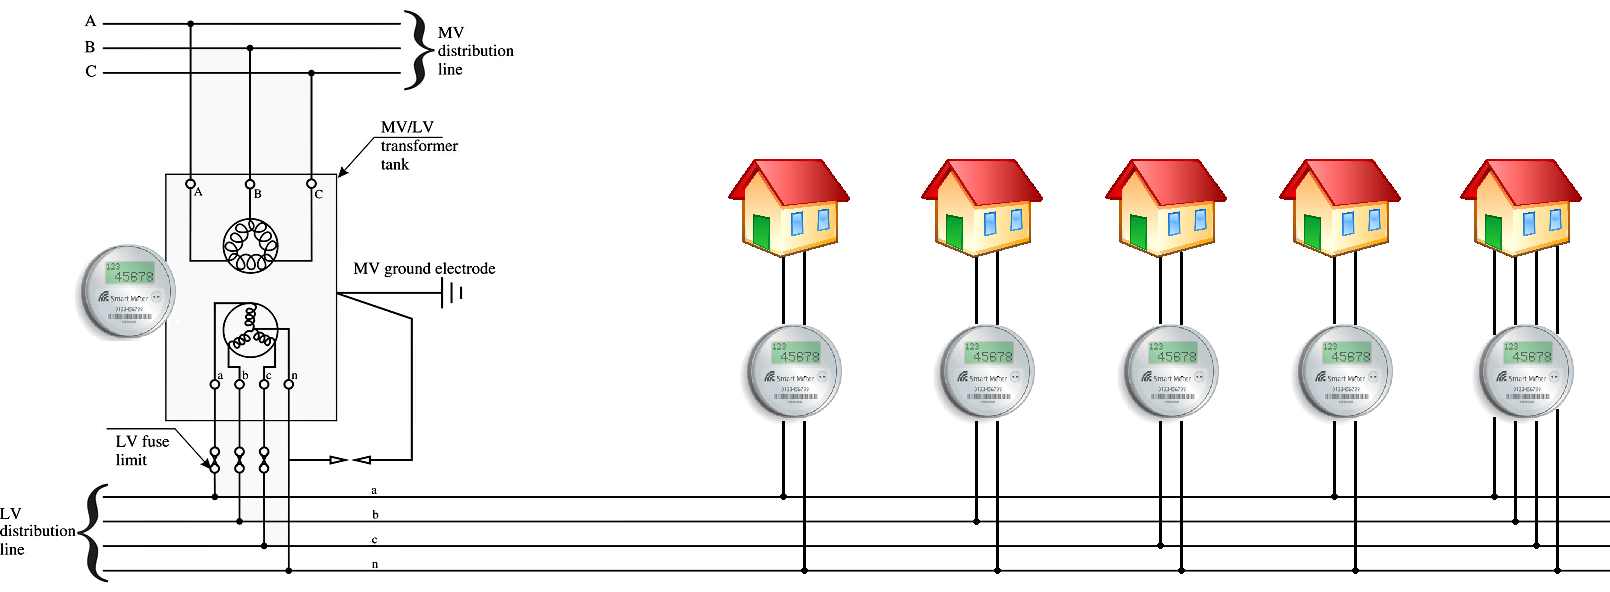

<b>Consider <i>N</i> customers whose connection phase assumes one out of three possible labels <i>a, b, </i> or <i> c</i> and estimate the correct customer-to-label assignment based on <i>M</i> readings whose per-phase values are a <i>function</i> of the corresponding phase-connected individual customer reading.</b>

## Problem Description

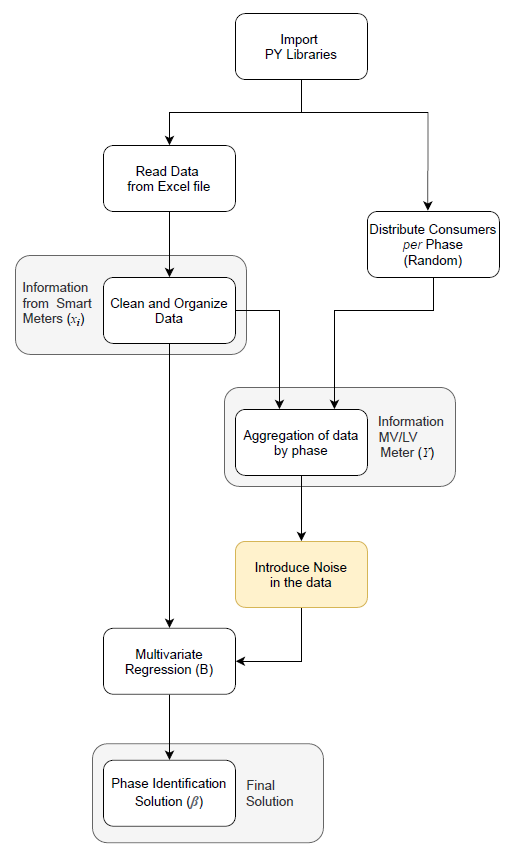

Import Python Libraries

In [56]:
import pandas as pd
import numpy as np
from numpy.random import randint, random, uniform
import matplotlib.pyplot as plt

Parameters (It is possible to change to test different input data)

In [2]:
nc=4                        # Number of consumers (1 to nc)                  %%Data Notes: nc=4
ts=60                       #start period of analysis (Can be from 1 to 96)  %%Data Notes: ts=60
te=71                       #Last period of analysis (Can be from 1 to 96)   %%Data Notes: te=71
phase =[3,2,1,3]            #To obtain the same values of lecture notes
noise = 0
#phase = randint(1, 4, nc)  #To obtain random values

print ("The distribution of consumers in each phase is: ", phase)

The distribution of consumers in each phase is:  [3, 2, 1, 3]


Import data (From Excel file)

In [3]:
raw_data = np.array(pd.read_excel ('Prob1_Conso_Data.xlsx', header=None))

Clean and organize the data (delete zeros and organize by consumers)

In [4]:
checks=0
nr=1
data=np.zeros((1,96))
#h=np.arange(1/96, 1, 1/96).tolist()
h=raw_data[0:96,0]
for i in range(1,raw_data.shape[0]+1):
    if i==0:
        print(i)
    if raw_data[i-1,0]==h[checks]:
        checks=checks+1
    else:
        checks=0
    if checks==96:
        if np.sum(raw_data[i-96:i,1])!=0:
            data[nr-1,0:96]=raw_data[i-96:i,1]
            data.resize((nr+1,96))
            nr=nr+1
        checks=0
data.resize((nr-1,96))

data.shape[0]      #Can be deleted
print ("The number of consumers is ", data.shape[0], " and the number of periods is ", data.shape[1])

The number of consumers is  1390  and the number of periods is  96


Select data from consumers and period (Truncate the original matrix) 

In [5]:
data_Aux1=data[0:nc,:]
pw=data_Aux1[:,ts-1:te]

print ("The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)")
print ("In the lecture notes, this value is represented by X.")
print ("The value of X is:\n",np.transpose(4*pw))   # We should multiply by 4 to obtain the same values of the lectures. 
                                                    # In fact the original values are the average energy consumption for
                                                    # 15 minutes. To obtain the power, we should multiply by 4  
X = np.transpose(4*pw)

The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)
In the lecture notes, this value is represented by X.
The value of X is:
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]]


Consumers aggregation by phase and noise inclusion (normal distribution).

In [68]:
Y = np.zeros([len(X), 3])
phase = [3,2,1,3]

for client_idx, client_phase in enumerate(phase):
    # print(client_idx, client_phase)
    Y[:, client_phase - 1] += X[:, client_idx]

Y_noise = Y + random(Y.shape)

print('Original Y:\n', Y)
print('\nY with noise:\n',np.round(Y_noise, 3))

Original Y:
 [[0.084 0.064 0.452]
 [0.276 0.164 0.3  ]
 [1.572 0.708 0.296]
 [1.188 3.44  0.54 ]
 [0.484 2.176 2.796]
 [0.316 3.02  2.14 ]
 [0.404 0.916 3.692]
 [0.396 0.64  2.216]
 [0.576 0.684 2.404]
 [0.828 0.564 3.996]
 [0.728 0.356 1.128]
 [0.308 0.22  0.976]]

Y with noise:
 [[1.007 0.22  1.229]
 [0.56  1.121 0.412]
 [1.907 1.651 1.161]
 [2.068 3.661 1.026]
 [0.686 2.298 3.71 ]
 [0.468 3.736 2.216]
 [0.965 1.85  4.688]
 [1.068 1.631 3.089]
 [0.692 0.78  2.93 ]
 [1.496 0.673 4.563]
 [1.643 1.326 2.049]
 [0.434 0.807 1.1  ]]


Multivariate Regression 

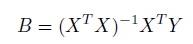

In [7]:
# print ("To BE DONE")
beta = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y
print('without noise:\n', np.round(beta, 3))

beta_noise = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y_noise
print('\nwith noise: \n', np.round(beta_noise, 3))

without noise:
 [[-0. -0.  1.]
 [-0.  1.  0.]
 [ 1.  0. -0.]
 [ 0.  0.  1.]]

with noise: 
 [[ 0.027  0.031  0.923]
 [-0.033  1.052 -0.024]
 [ 1.696  0.538  0.71 ]
 [ 0.087  0.109  1.011]]


Plot

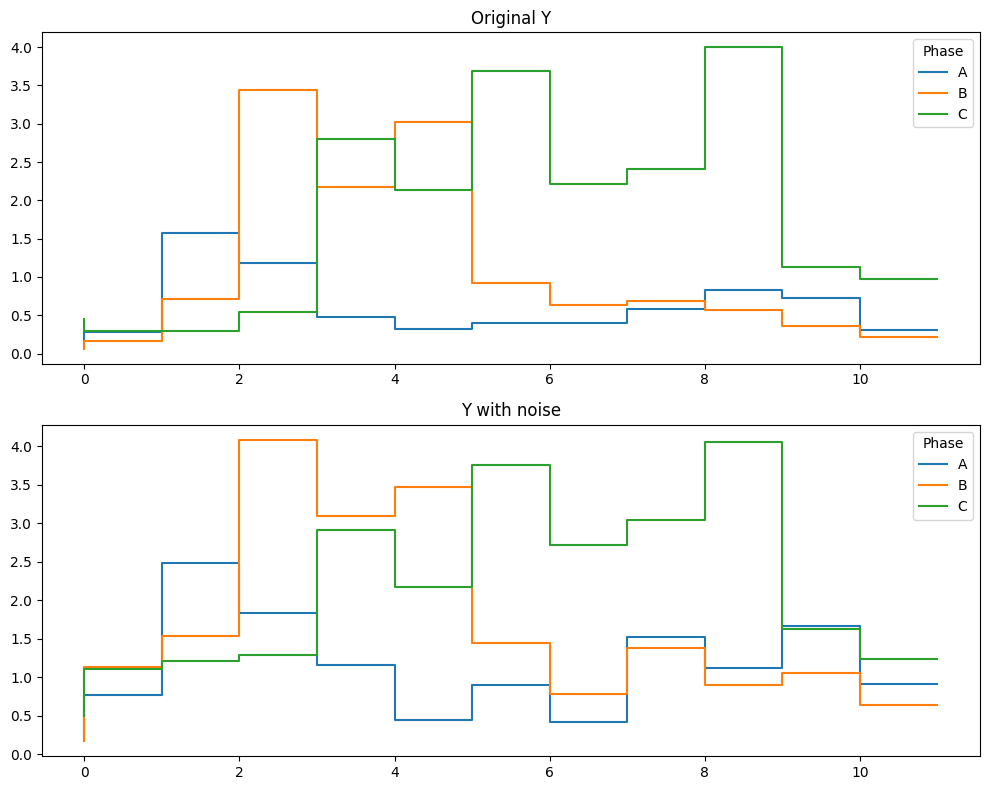

In [18]:
# print ("To BE DONE")
# plt.step(range(len(Y)), Y, label = ['A', 'B', 'C'])
# plt.legend()
# plt.show()

# plt.step(range(len(Y_noise)), Y_noise, label = ['A', 'B', 'C'])
# plt.legend()
# plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].step(range(len(Y)), Y, label=['A', 'B', 'C'])
axs[0].legend(title = 'Phase')
axs[0].set_title('Original Y')

axs[1].step(range(len(Y_noise)), Y_noise, label=['A', 'B', 'C'])
axs[1].legend(title = 'Phase')
axs[1].set_title('Y with noise')

plt.tight_layout()
plt.show()

# Extra Challenges
Think about an interesting variation to this problem or a different way to solve and implement it !!!

Some ideas:
- What happens if we have two consumers with the same consumption ? What about if the difference is very small ? Can we quantify the sensitivity ?
- What happens if we have three-phase clients ? Can we follow the same approach ?

### 1. What happens if we have two consumers with the same consumption ?

- Same consumption, different phases:

In [167]:
phase = [3,2,1,3]

X2 = X.copy()
X2[:, 2] = X2[:, 1]

Y = np.zeros([len(X2), 3])
for client_idx, client_phase in enumerate(phase):
    Y[:, client_phase - 1] += X2[:, client_idx]

Y_noise = Y + random(Y.shape)
# print('X same:\n', X2)

xTx = np.transpose(X2) @ X2
# print('\nxTx:\n', np.round(xTx, 3))

# print('\ninverse of xTx:\n', np.round(np.linalg.inv(xTx), 3))

beta_diff = np.linalg.inv(xTx) @ np.transpose(X2) @ Y
beta_diff_noise = np.linalg.inv(xTx) @ np.transpose(X2) @ Y_noise

print('\nbeta same consumption and different phase:\n', np.round(beta_diff, 3))
print('\nbeta same consumption with noise:\n', np.round(beta_diff_noise, 3))


beta same consumption and different phase:
 [[-0.579 -0.579  0.511]
 [ 1.304  1.304  0.229]
 [ 0.     0.     0.   ]
 [ 0.     0.     1.   ]]

beta same consumption with noise:
 [[-0.445 -0.509  0.66 ]
 [ 1.463  1.37   0.35 ]
 [ 0.     0.     0.   ]
 [-0.055  0.126  1.053]]


* Same consumption same phase

In [168]:
phase = [3,2,1,3]

X2 = X.copy()
X2[:, 3] = X2[:, 1] # both clients from same phase

Y = np.zeros([len(X2), 3])
for client_idx, client_phase in enumerate(phase):
    Y[:, client_phase - 1] += X2[:, client_idx]

Y_noise = Y + random(Y.shape)
# print('X same:\n', X2)

xTx = np.transpose(X2) @ X2
# print('\nxTx:\n', np.round(xTx, 3))

# print('\ninverse of xTx:\n', np.round(np.linalg.inv(xTx), 3))

beta_same = np.linalg.inv(xTx) @ np.transpose(X2) @ Y
beta_same_noise = np.linalg.inv(xTx) @ np.transpose(X2) @ Y_noise

print('\nbeta same consumption:\n', np.round(beta_same, 3))
print('\nbeta same consumption with noise:\n', np.round(beta_same_noise, 3))


beta same consumption:
 [[-0.059 -0.186  0.723]
 [-0.041  0.914  0.839]
 [ 1.     0.     0.   ]
 [ 0.     0.     0.   ]]

beta same consumption with noise:
 [[-0.033 -0.122  0.957]
 [-0.094  0.925  0.752]
 [ 1.796  0.598  0.222]
 [ 0.     0.     0.   ]]


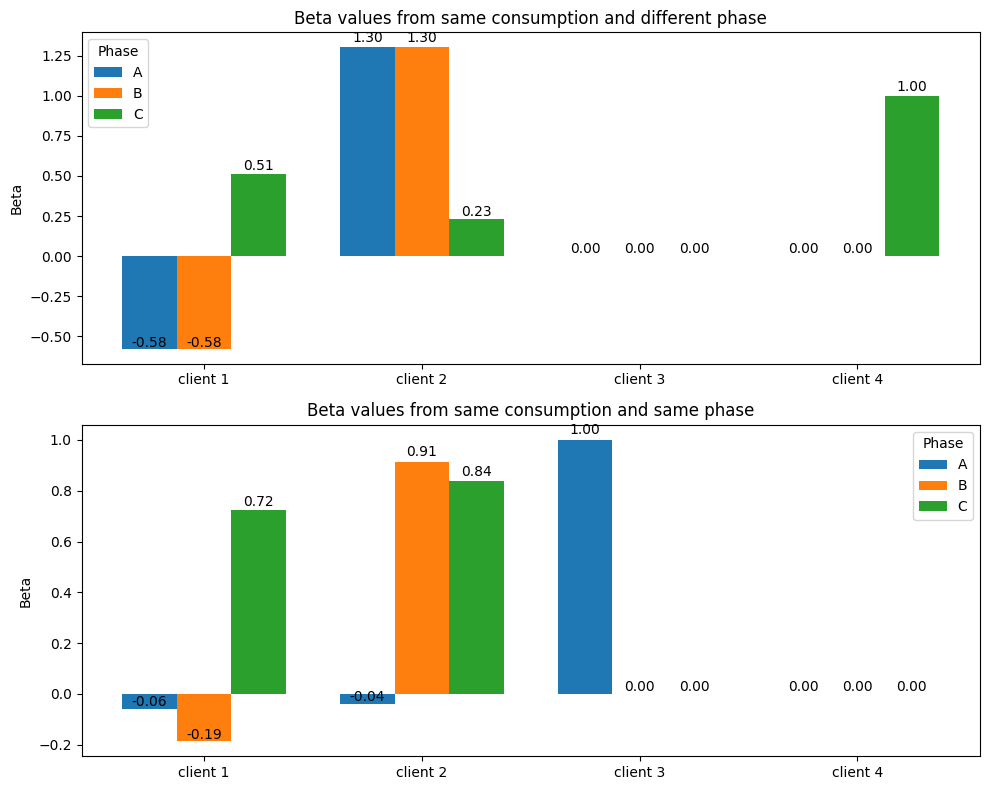

In [169]:
num_rows, num_columns = beta_diff.shape
group_positions = np.arange(num_rows)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

bar_width = 0.25
phase_name = ['A', 'B', 'C']
for i in range(num_columns):
    bar_positions = group_positions + (i * bar_width)
    bars0 = ax[0].bar(bar_positions, beta_diff[:, i], width=bar_width, label=phase_name[i])
    
    # Beta with noise
    bars1 = ax[1].bar(bar_positions, beta_same[:, i], width=bar_width, label=phase_name[i])

    for bar0, bar1 in zip(bars0, bars1):
        ax[0].text(bar0.get_x() + bar0.get_width()/2, 1.01 * bar0.get_height(),
                   f'{bar0.get_height():.2f}', ha='center', va='bottom')
        ax[1].text(bar1.get_x() + bar1.get_width()/2, 1.01 * bar1.get_height(),
                   f'{bar1.get_height():.2f}', ha='center', va='bottom')

ax[0].set_xticks(group_positions + bar_width)
ax[0].set_xticklabels([f"client {i+1}" for i in range(len(beta_diff))])
ax[0].set_ylabel('Beta')
ax[0].set_title('Beta values from same consumption and different phase')
ax[0].legend(title = 'Phase')

ax[1].set_xticks(group_positions + bar_width)
ax[1].set_xticklabels([f"client {i+1}" for i in range(len(beta_same))])
ax[1].set_ylabel('Beta')
ax[1].set_title('Beta values from same consumption and same phase')
ax[1].legend(title = 'Phase')

# Showing the plot
plt.tight_layout()
plt.show()


What about if the difference is very small ? Can we quantify the sensitivity ?

In [176]:
phase = [3,2,1,3]

X3 = X.copy()
X3[:, 2] = X3[:, 1] * uniform(0.98, 1.02, len(X3)) # slightly changing +- 2%

Y = np.zeros([len(X3), 3])
for client_idx, client_phase in enumerate(phase):
    Y[:, client_phase - 1] += X3[:, client_idx]

Y_noise = Y + random(Y.shape)
print('X slightly same:\n', X3)

xTx = np.transpose(X3) @ X3
# print('\nxTx:\n', np.round(xTx, 3))

# print('\ninverse of xTx:\n', np.round(np.linalg.inv(xTx), 3))

beta3 = np.linalg.inv(xTx) @ np.transpose(X3) @ Y
beta3_noise = np.linalg.inv(xTx) @ np.transpose(X3) @ Y_noise

print('\nbeta same consumption:\n', np.round(beta3, 3))
print('\nbeta same consumption with noise:\n', np.round(beta3_noise, 3))

X slightly same:
 [[0.332      0.064      0.06519937 0.12      ]
 [0.236      0.164      0.16533561 0.064     ]
 [0.224      0.708      0.72001407 0.072     ]
 [0.36       3.44       3.4358587  0.18      ]
 [1.332      2.176      2.19606441 1.464     ]
 [1.516      3.02       3.02833178 0.624     ]
 [0.92       0.916      0.91684438 2.772     ]
 [0.752      0.64       0.63819379 1.464     ]
 [1.828      0.684      0.67042798 0.576     ]
 [3.568      0.564      0.56356452 0.428     ]
 [0.78       0.356      0.36000305 0.348     ]
 [0.856      0.22       0.2189264  0.12      ]]

beta same consumption:
 [[-0. -0.  1.]
 [ 0.  1.  0.]
 [ 1.  0. -0.]
 [-0.  0.  1.]]

beta same consumption with noise:
 [[ 1.4600e-01  1.4000e-02  1.1750e+00]
 [-1.5063e+01  1.6453e+01 -2.3312e+01]
 [ 1.6208e+01 -1.5341e+01  2.3369e+01]
 [ 6.0000e-03  3.0400e-01  1.0410e+00]]


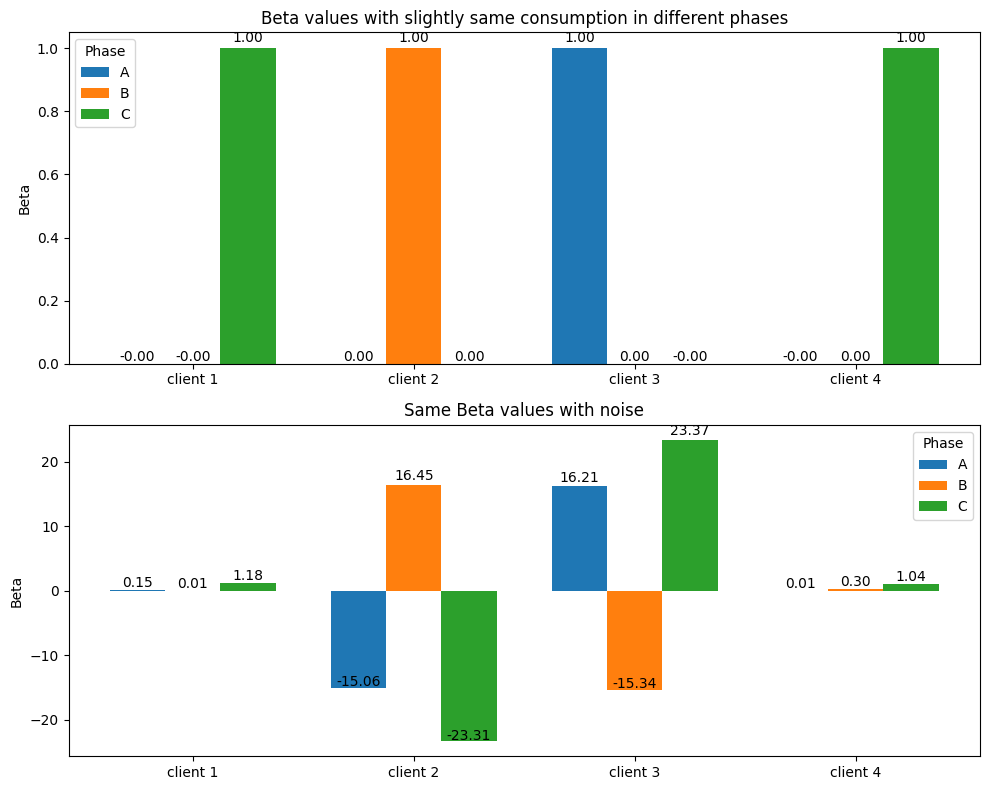

In [177]:
num_rows, num_columns = beta3.shape
group_positions = np.arange(num_rows)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

bar_width = 0.25
phase_name = ['A', 'B', 'C']
for i in range(num_columns):
    bar_positions = group_positions + (i * bar_width)
    bars0 = ax[0].bar(bar_positions, beta3[:, i], width=bar_width, label=phase_name[i])
    
    # Beta with noise
    bars1 = ax[1].bar(bar_positions, beta3_noise[:, i], width=bar_width, label=phase_name[i])

    for bar0, bar1 in zip(bars0, bars1):
        ax[0].text(bar0.get_x() + bar0.get_width()/2, 1.01 * bar0.get_height(),
                   f'{bar0.get_height():.2f}', ha='center', va='bottom')
        ax[1].text(bar1.get_x() + bar1.get_width()/2, 1.01 * bar1.get_height(),
                   f'{bar1.get_height():.2f}', ha='center', va='bottom')

ax[0].set_xticks(group_positions + bar_width)
ax[0].set_xticklabels([f"client {i+1}" for i in range(len(beta3))])
ax[0].set_ylabel('Beta')
ax[0].set_title('Beta values with slightly same consumption in different phases')
ax[0].legend(title = 'Phase')

ax[1].set_xticks(group_positions + bar_width)
ax[1].set_xticklabels([f"client {i+1}" for i in range(len(beta3_noise))])
ax[1].set_ylabel('Beta')
ax[1].set_title('Same Beta values with noise')
ax[1].legend(title = 'Phase')

# Showing the plot
plt.tight_layout()
plt.show()

### 2. What happens if we have three-phase clients ? Can we follow the same approach ?

In [178]:
X3 = X.copy()

Y = np.zeros([len(X3), 3])
for client_idx, client_phase in enumerate(phase):
    if client_idx == 0: # client 0 is 3-phased
        Y[:, 0] += X3[:, client_idx] / 3
        Y[:, 1] += X3[:, client_idx] / 3
        Y[:, 2] += X3[:, client_idx] / 3
    else:
        Y[:, client_phase - 1] += X3[:, client_idx]

Y_noise = Y + random(Y.shape)

xTx = np.transpose(X3) @ X3
# print('\nxTx:\n', np.round(xTx, 3))

# print('\ninverse of xTx:\n', np.round(np.linalg.inv(xTx), 3))

beta3 = np.linalg.inv(xTx) @ np.transpose(X3) @ Y
beta3_noise = np.linalg.inv(xTx) @ np.transpose(X3) @ Y_noise

print('\nbeta with 3-phased client:\n', np.round(beta3, 3))
print('\nbeta with 3-phased client with noise:\n', np.round(beta3_noise, 3))


beta with 3-phased client:
 [[ 0.333  0.333  0.333]
 [-0.     1.     0.   ]
 [ 1.     0.    -0.   ]
 [-0.     0.     1.   ]]

beta with 3-phased client with noise:
 [[ 0.57   0.355  0.584]
 [-0.045  1.065 -0.014]
 [ 1.452  0.331  0.285]
 [-0.065  0.048  1.   ]]


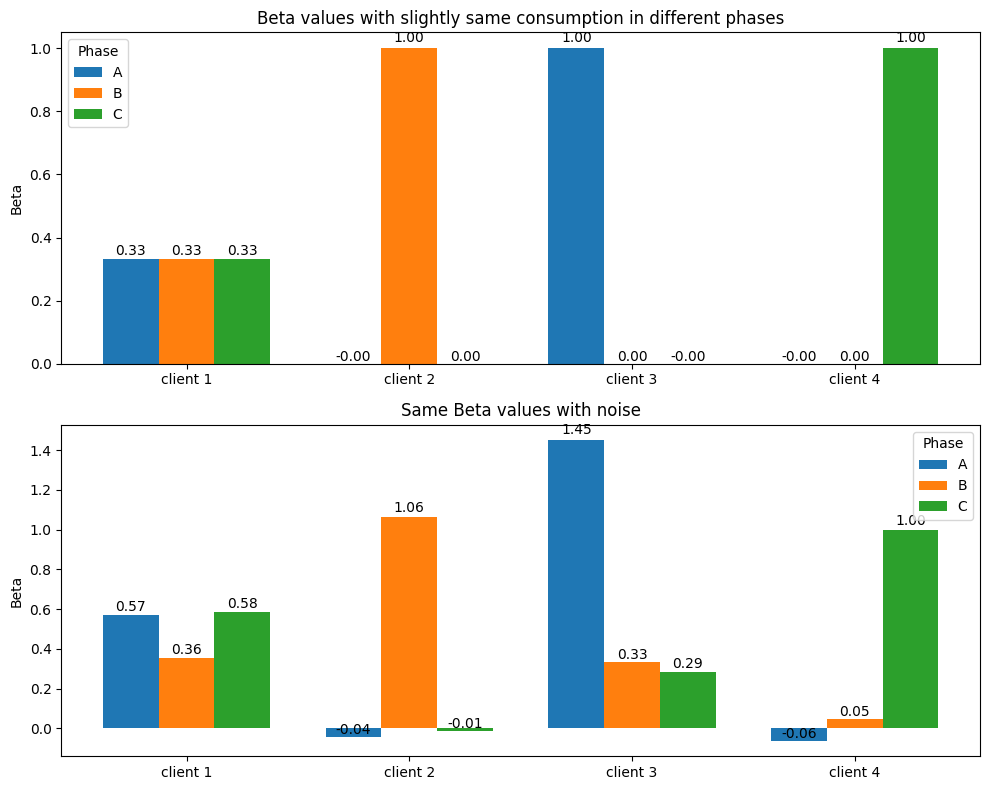

In [179]:
num_rows, num_columns = beta3.shape
group_positions = np.arange(num_rows)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

bar_width = 0.25
phase_name = ['A', 'B', 'C']
for i in range(num_columns):
    bar_positions = group_positions + (i * bar_width)
    bars0 = ax[0].bar(bar_positions, beta3[:, i], width=bar_width, label=phase_name[i])
    
    # Beta with noise
    bars1 = ax[1].bar(bar_positions, beta3_noise[:, i], width=bar_width, label=phase_name[i])

    for bar0, bar1 in zip(bars0, bars1):
        ax[0].text(bar0.get_x() + bar0.get_width()/2, 1.01 * bar0.get_height(),
                   f'{bar0.get_height():.2f}', ha='center', va='bottom')
        ax[1].text(bar1.get_x() + bar1.get_width()/2, 1.01 * bar1.get_height(),
                   f'{bar1.get_height():.2f}', ha='center', va='bottom')

ax[0].set_xticks(group_positions + bar_width)
ax[0].set_xticklabels([f"client {i+1}" for i in range(len(beta3))])
ax[0].set_ylabel('Beta')
ax[0].set_title('Beta values with slightly same consumption in different phases')
ax[0].legend(title = 'Phase')

ax[1].set_xticks(group_positions + bar_width)
ax[1].set_xticklabels([f"client {i+1}" for i in range(len(beta3_noise))])
ax[1].set_ylabel('Beta')
ax[1].set_title('Same Beta values with noise')
ax[1].legend(title = 'Phase')

# Showing the plot
plt.tight_layout()
plt.show()